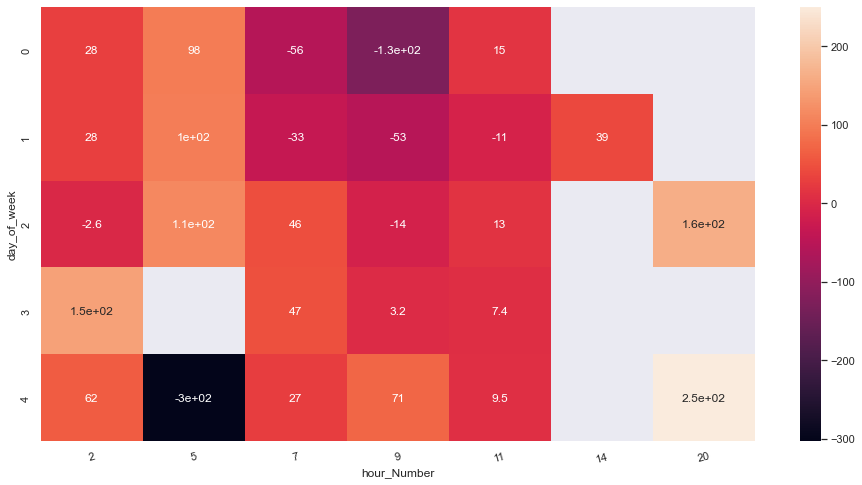

In [51]:
import csv
import json
from sys import displayhook
from bokeh.core.properties import Null
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
# con la libreria install ipympl podemos interactuar con los graficos
df=Null
balance=Null
drawdown=Null
def csv_to_json(csvFilePath):
    global df
    global drawdown
    global balance
    df = pd.read_csv(csvFilePath)
    df.drop(df.tail(10).index,inplace=True)
    df = df[df['Profit'].notna()]
    
    balance=calcule_balance(df, 'Profit')
    
   



    
    


def plot_multiple_figures():
    global df
    plt.figure(1)
   
    plt.plot(balance, label='Balance', color='green')

     #add legend
    plt.legend(title='Leyend')

    #add axes labels and a title
    plt.ylabel('Balance', fontsize=14)
    plt.title('Bot TrackRecord', fontsize=16)
        

    #add axes labels and a title
    
   
    plt.figure(2)
   
    plt.plot(balance, label='Balance', color='red')
    plt.plot(df['Profit'], label='Profit', color='blue')

     #add legend
    plt.legend(title='Leyend')

    #add axes labels and a title
    plt.xlabel('Operaciones', fontsize=14)
    plt.title('Bot TrackRecord', fontsize=16)
        

    #add axes labels and a title
    
    plt.title('Profit vs Drawdown', fontsize=16)

    plt.figure(3)
   
    #plt.plot(df['Drawdown'], label='Drawdown', color='red')
    #plt.plot(df['Profit'], label='Profit', color='blue')
   # plt.plot(df['Gain'])
    
    
    plt.plot(df['Profit'], label='Profit', color='blue')
    plt.plot(df['Pips'], label='Gain', color='green')

     #add legend
    plt.legend(title='Leyend')

    #add axes labels and a title

        

    #add axes labels and a title
    
    plt.title('Profit vs Drawdown vs Balance', fontsize=16)

    
    #df = df[df['Drawdown'].notna()]
  
    plt.figure(4)

    
    c = balance.subtract(df['Drawdown'])
   
    
    plt.plot(balance, label='Balance', color='green')
    plt.plot(c, label='Drawdown', color='red')
    

    

    plt.show()
    #df.plot("Profit", title="Gain vs Time")


def plot_cercle():
     symbols=df['Symbol'].value_counts().index.values
     counters=df['Symbol'].value_counts().values
     print(symbols)
     print(counters)
    

     plt.pie(counters, labels = symbols,pctdistance=10,shadow=False)
     plt.title("Hola")
     plt.legend()

    #  for i,sym in enumerate(symbols):
    #     print(f"Hay {counters[i]} en el {sym}")

    #add axes labels and a title
    # plt.ylabel('Balance', fontsize=14)
    # plt.xlabel('Operaciones', fontsize=14)
    # plt.title('Bot TrackRecord', fontsize=16)


    # df = df[df['Drawdown'].notna()]
    # df = df[df['Open Date'].notna()]


    #frames.plot(title='holaaa', x='Open Data', y='Drawdown')
    #matplotlib.pyplot.plot_date(date_time,frames['Drawdown'])
    #date_time=pd.to_datetime(frames['Open Date'])

    #plt.plot(frames['Drawdown'],date_time, linewidth = 3, c = 'g')
def mapa_de_calor():
    df['Open Date'] = pd.to_datetime(df['Open Date'])
    df['day_of_week'] = df['Open Date'].dt.dayofweek
    df['hour_Number'] = df['Open Date'].dt.hour
    
    df_calor = df[['hour_Number','day_of_week','Profit']].copy()
    #df_calor.columns = [''] * len(df_calor.columns)
    heatmap_pt = pd.pivot_table(df_calor,values ='Profit', index=['day_of_week'], columns='hour_Number')
    #data_pivoted = df_calor.pivot('hour_Number','day_of_week','Profit')
    #sns.heatmap(df_calor.pivot(columns="day_of_week", "hour_Number",values='Profit'))
    #sns.heatmap(df_calor[['day_of_week', 'Profit']])
    fig, ax = plt.subplots(figsize=(16,8))
    sns.set()
    sns.heatmap(heatmap_pt, annot=True)
    plt.xticks(rotation=15)
    plt.show()
    
def calcule_balance(df,kpi):
    balance = []
    balance_final = []
    for profit in df[kpi]:
       balance.append(int(profit))
       balance_final.append(sum(balance))

    return pd.DataFrame(balance_final)


    return pd.DataFrame(balance_final)

    #bal.plot(label='Equity')
    #plot individual lines with custom colors and labels
    plt.figure(1)
    plt.plot(bal, label='Profit', color='green')
    #plt.plot(df['Drawdown'], label='Drawdown', color='red')


    #add legend
    plt.legend(title='Leyenda')

    #add axes labels and a title
    plt.ylabel('Balance', fontsize=14)
    plt.xlabel('Operaciones', fontsize=14)
    plt.title('Bot TrackRecord', fontsize=16)




    plt.figure(2)
    plt.plot(bal, label='Profit', color='green')
    #plt.plot(df['Drawdown'], label='Drawdown', color='red')


    #add legend
    plt.legend(title='Leyenda')

    #add axes labels and a title
    plt.ylabel('Balance', fontsize=14)
    plt.xlabel('Operaciones', fontsize=14)
    plt.title('Bot TrackRecord', fontsize=16)






    #display plot
    plt.show()



csvFilePath = r'9d832a941b1b626204ebc608e2788e271.csv'

csv_to_json(csvFilePath)

#plot_multiple_series()
#plot_multiple_figures()
#plot_cercle()
mapa_de_calor()
